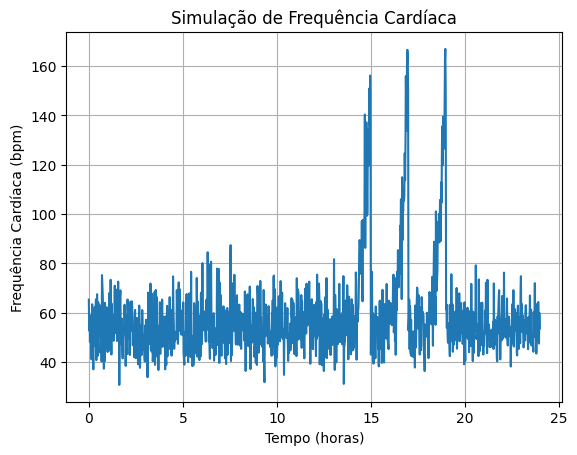

In [1]:
import numpy as np
import matplotlib.pyplot as plt

picos_horarios = [14, 16, 18]

tempo_total = 24
intervalo = 0.02

tempo = np.arange(0, tempo_total, intervalo)

frequencia_cardiaca = np.zeros_like(tempo)

duracao_pico = int(1 / intervalo)

limite_minimo = 50
limite_maximo = 160

tendencia = np.zeros_like(tempo)
for pico_horario in picos_horarios:
    indice_inicio_pico = int(pico_horario * (1 / intervalo))
    tendencia[indice_inicio_pico:indice_inicio_pico + duracao_pico] += np.linspace(0, 1, duracao_pico) ** 2
    
# Adicionar variações aleatórias à tendência
tendencia += np.random.normal(0, 0.1, len(tempo))

# Limitar os valores mínimos e máximos da tendência
tendencia = np.clip(tendencia, 0, 1)

# Multiplica a tendência pelos limites desejados para obter a frequência cardíaca
frequencia_cardiaca = tendencia * (limite_maximo - limite_minimo) + limite_minimo

# Adicionar um pouco de ruído aos dados
frequencia_cardiaca += np.random.normal(0, 5, len(tempo))

frequencia_cardiaca[0:indice_inicio_pico] += np.random.normal(0, 5, indice_inicio_pico)


plt.plot(tempo, frequencia_cardiaca)
plt.title('Simulação de Frequência Cardíaca')
plt.xlabel('Tempo (horas)')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.grid(True)
plt.show()



### Tempo real( 2 em 2 min, e exibindo a bateria)

In [1]:
import sys
import random
import time
from azure.iot.device import IoTHubDeviceClient, Message
import json
import asyncio

connectionString = "" #!
DEVICE_ID = "eagle13nari"

def simulate_heart_rate():
    battery = 100.0
    timestamp = time.time()
    
    while True:
        current_time = time.localtime(timestamp)
        
        if current_time.tm_hour >= 0 and current_time.tm_hour < 6:
            heart_rate = random.randint(50, 60)
        elif current_time.tm_hour >= 6 and current_time.tm_hour < 12:
            heart_rate = random.randint(60, 80)
        elif current_time.tm_hour >= 14 and current_time.tm_hour < 16:
            heart_rate = random.randint(100, 120)
        elif current_time.tm_hour >= 16 and current_time.tm_hour < 18:
            heart_rate = random.randint(120, 140)
        else:
            heart_rate = random.randint(60, 80)
        
        battery -= 0.1

        data={
            "device_id": DEVICE_ID,
            "timestamp": timestamp,
            "heart_rate": heart_rate,
            "battery": battery
        }
        
        transmit_data(heart_rate, battery)
        asyncio.run(send_data_to_iothub(data=json.dumps(data)))
        time.sleep(120)
        
        timestamp = time.time()

def transmit_data(heart_rate, battery):
    current_time = time.localtime(time.time())
    data = f"Heart Rate: {heart_rate} bpm | Battery: {battery:.1f}%\nTransmitido às {current_time.tm_hour}:{current_time.tm_min}\n"
    sys.stdout.write(data)
    sys.stdout.flush()
    # print(f"Heart Rate: {heart_rate} bpm | Battery: {battery:.1f}%")
    # print(f"Transmitido às {current_time.tm_hour}:{current_time.tm_min}")

async def send_data_to_iothub(data):
    try:
        device_client = IoTHubDeviceClient.create_from_connection_string(connectionString)
        await device_client.connect()
        await device_client.send_message(data)
        print(f"Mensagem enviada com sucesso! Heart Rate: {heart_rate} bpm | Battery: {battery:.1f}%")
        await device_client.shutdown()
    except Exception as e:
        print("Erro ao enviar mensagem:", str(e))

simulate_heart_rate()

Heart Rate: 136 bpm | Battery: 99.9%
Transmitido às 17:16
Mensagem enviada com sucesso! Heart Rate: 136 bpm | Battery: 99.9%
Heart Rate: 120 bpm | Battery: 99.8%
Transmitido às 17:18


Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']


Mensagem enviada com sucesso! Heart Rate: 120 bpm | Battery: 99.8%


Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to handle.
['azure.iot.device.common.transport_exceptions.ConnectionDroppedError: Unexpected disconnection\n']
Exception caught in background thread.  Unable to ha